# Clustering Crypto

In [1]:
%%capture
# Initial imports
import requests
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Fetching Cryptocurrency Data

In [2]:
from pathlib import Path
# Alternatively, use the provided csv file:
file_path = Path("Resources/crypto_data.csv")

# Create a DataFrame
df = pd.read_csv(file_path)
df.tail()

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000
1251,PUNK,SteamPunk,PoS,False,PoS,NaN,40000000


### Data Preprocessing

In [3]:
# Keep only necessary columns:
# 'CoinName','Algorithm','IsTrading','ProofType','TotalCoinsMined','TotalCoinSupply'
df_new = df.drop(['Unnamed: 0'], axis=True)

In [4]:
# count nulls
for column in df_new.columns:
    print(f"Column {column} has {df_new[column].isnull().sum()} null values")

Column CoinName has 0 null values
Column Algorithm has 0 null values
Column IsTrading has 0 null values
Column ProofType has 0 null values
Column TotalCoinsMined has 508 null values
Column TotalCoinSupply has 0 null values


In [5]:
# drop nulls 
df_new.dropna(inplace=True)

In [6]:
# Keep only cryptocurrencies that are trading
df_new.index[df_new['IsTrading'] == True].tolist()
df_new = df_new.loc[df_new['IsTrading']]
# verify that only cryptocurrencies that are trading remain.
df_new['IsTrading'].value_counts()

True    685
Name: IsTrading, dtype: int64

In [7]:
# Keep only cryptocurrencies with a working algorithm
# Checking for working algorithms
df_new['Algorithm'].unique()

array(['Scrypt', 'SHA-256', 'X13', 'Ethash', 'X11', 'CryptoNight-V7',
       'Equihash', 'SHA-512', 'Multiple', 'X15', 'Quark', 'Groestl',
       'PoS', 'NIST5', 'NeoScrypt', 'SHA3', 'HybridScryptHash256',
       'Scrypt-n', 'PHI1612', 'Lyra2REv2', 'CryptoNight', 'Shabal256',
       'Counterparty', 'Momentum', 'Stanford Folding', 'QuBit', 'M7 POW',
       'Lyra2RE', 'QUAIT', 'vDPOS', 'Blake2b', 'BLAKE256',
       '1GB AES Pattern Search', 'Blake', 'Dagger', 'CryptoNight-Lite',
       'X11GOST', 'POS 3.0', 'SHA-256D', 'Lyra2Z', 'X14', 'DPoS',
       'Keccak', 'Dagger-Hashimoto', 'Blake2S', '536', 'Argon2d',
       'Cloverhash', 'Skein', 'Time Travel', 'SkunkHash v2 Raptor',
       'VeChainThor Authority', 'Ouroboros', 'POS 2.0', 'SkunkHash',
       'C11', 'Proof-of-BibleHash', 'SHA-256 + Hive',
       'Proof-of-Authority', 'XEVAN', 'VBFT', 'IMesh', 'Green Protocol',
       'Semux BFT consensus', 'X16R', 'Tribus', 'CryptoNight Heavy',
       'Jump Consistent Hash', 'HMQ1725', 'Zhash', 'C

In [8]:
# Remove the "IsTrading" column
df_crypto = df_new.drop(['IsTrading'], axis=True)

In [9]:
# Remove rows with at least 1 null value
# Checking for Nulls
df_crypto.isnull().sum()

CoinName           0
Algorithm          0
ProofType          0
TotalCoinsMined    0
TotalCoinSupply    0
dtype: int64

In [10]:
# Remove rows with cryptocurrencies having no coins mined
df_crypto = df_crypto[df_crypto.loc[:]!=0].dropna()

In [11]:
# Drop rows where there are 'N/A' text values
# df_crypto = df_crypto[df_crypto != 'N/A'].dropna()
df_crypto.count(0)

CoinName           533
Algorithm          533
ProofType          533
TotalCoinsMined    533
TotalCoinSupply    533
dtype: int64

In [12]:
# Store the 'CoinName'column in its own DataFrame prior to dropping it from crypto_df
# coin_name = pd.DataFrame(df_crypto['CoinName'])

In [13]:
# Drop the 'CoinName' column since it's not going to be used on the clustering algorithm
df_crypto = df_crypto.set_index('CoinName', drop=True)
df_crypto.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
CoinName,,,,
42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
Bitcoin,SHA-256,PoW,1.792718e+07,21000000
Ethereum,Ethash,PoW,1.076842e+08,0


In [14]:
# Create dummy variables for text features
X = pd.get_dummies(df_crypto, columns=['Algorithm', 'ProofType'], drop_first=True)

In [15]:
# Standardize data
df_crypto_scaled = StandardScaler().fit_transform(X)

### Reducing Dimensions Using PCA

In [16]:
# Use PCA to reduce dimensions to 3 principal components
# Initialize PCA model
pca = PCA(n_components=3)

# Get 3 principal components for the iris data.
crypto_pca = pca.fit_transform(df_crypto_scaled)

In [17]:
# Create a DataFrame with the principal components data
df_crypto_pca = pd.DataFrame(
    data=crypto_pca, columns=["PC1", "PC2", "PC3"], index=df_crypto.index
)
df_crypto_pca.head()

,PC1,PC2,PC3
CoinName,,,
42 Coin,-0.325732,0.941695,-0.503479
404Coin,-0.309070,0.942041,-0.504007
EliteCoin,2.301211,1.721056,-0.636923
Bitcoin,-0.145543,-1.277635,0.149904
Ethereum,-0.160627,-1.985039,0.391719


### Clustering Crytocurrencies Using K-Means

#### Find the Best Value for `k` Using the Elbow Curve

In [18]:
inertia = []
k = list(range(1, 11))

# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(df_crypto_pca)
    inertia.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="inertia", xticks=k, title="Elbow Curve")

:Curve   [k]   (inertia)

Running K-Means with `k=<your best value for k here>`

In [19]:
# Initialize the K-Means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(df_crypto_pca)

# Predict clusters
predictions = model.predict(df_crypto_pca)

# Add the predicted class columns
df_crypto_pca["Class"] = model.labels_
df_crypto_pca.head()

,PC1,PC2,PC3,Class
CoinName,,,,
42 Coin,-0.325732,0.941695,-0.503479,0
404Coin,-0.309070,0.942041,-0.504007,0
EliteCoin,2.301211,1.721056,-0.636923,0
Bitcoin,-0.145543,-1.277635,0.149904,1
Ethereum,-0.160627,-1.985039,0.391719,1


In [21]:
# Create a new DataFrame including predicted clusters and cryptocurrencies features
clustered_df = pd.concat([df_crypto, df_crypto_pca], axis=1)
clustered_df.head()

,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply,PC1,PC2,PC3,Class
CoinName,,,,,,,,
42 Coin,Scrypt,PoW/PoS,4.199995e+01,42,-0.325732,0.941695,-0.503479,0
404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000,-0.309070,0.942041,-0.504007,0
EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359,2.301211,1.721056,-0.636923,0
Bitcoin,SHA-256,PoW,1.792718e+07,21000000,-0.145543,-1.277635,0.149904,1
Ethereum,Ethash,PoW,1.076842e+08,0,-0.160627,-1.985039,0.391719,1


### Visualizing Results

#### 3D-Scatter with Clusters

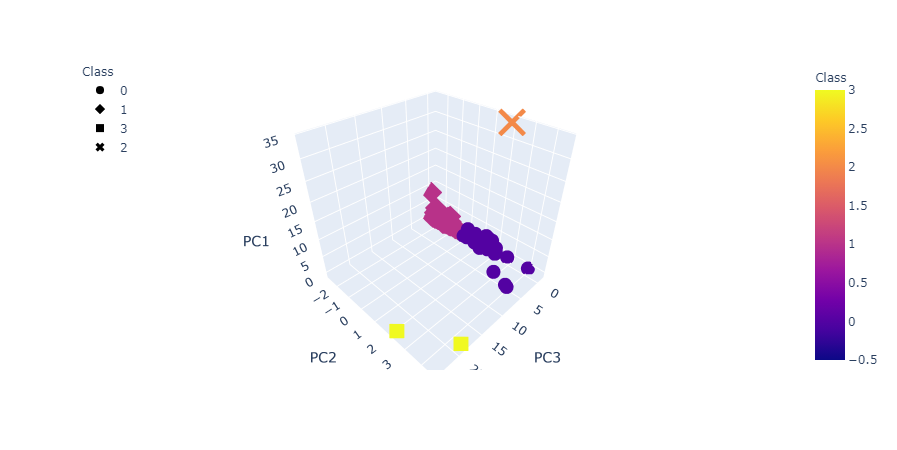

In [27]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    clustered_df,
    x="PC3",
    y="PC2",
    z="PC1",
    color="Class",
    symbol="Class",
    width=800,
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

#### Table of Tradable Cryptocurrencies

In [ ]:
# Table with tradable cryptos


In [ ]:
# Print the total number of tradable cryptocurrencies


#### Scatter Plot with Tradable Cryptocurrencies

In [ ]:
# Scale data to create the scatter plot


In [ ]:
# Plot the scatter with x="TotalCoinsMined" and y="TotalCoinSupply"
